In [1]:
# Importando as Bibliotecas Básicas
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
# Importando a Biblioteca do KNN
from sklearn.neighbors import KNeighborsClassifier
# Importando a Biblioteca de Acurácia, Matriz de Confusão (em quantos jogos entrou em quantos foi green ou red)
from sklearn.metrics import accuracy_score, confusion_matrix
# Importando a Biblioteca SkLearn para padronizar os dados (entre 0 e 1)
from sklearn.preprocessing import StandardScaler
# Importando a Biblioteca SkLearn para dividir os dados entre treinamento e teste
from sklearn.model_selection import train_test_split

In [3]:
# Importando os DataFrames

# England Premier League
df_ENG1 = pd.read_excel('https://github.com/futpythontrader/YouTube/blob/main/England%20Premier%20League_20212022.xlsx?raw=true')
# England Championship
df_ENG2 = pd.read_excel('https://github.com/futpythontrader/YouTube/blob/main/England%20Championship_20212022.xlsx?raw=true')

# France Ligue 1
df_FRA1 = pd.read_excel('https://github.com/futpythontrader/YouTube/blob/main/France%20Ligue%201_20212022.xlsx?raw=true')
# France Ligue 2
df_FRA2 = pd.read_excel('https://github.com/futpythontrader/YouTube/blob/main/France%20Ligue%202_20212022.xlsx?raw=true')

# Germany Bundesliga
df_GER1 = pd.read_excel('https://github.com/futpythontrader/YouTube/blob/main/Germany%20Bundesliga_20212022.xlsx?raw=true')
# Germany 2. Bundesliga
df_GER2 = pd.read_excel('https://github.com/futpythontrader/YouTube/blob/main/Germany%202.%20Bundesliga_20212022.xlsx?raw=true')

# Italy Serie A
df_ITA1 = pd.read_excel('https://github.com/futpythontrader/YouTube/blob/main/Italy%20Serie%20A_20212022.xlsx?raw=true')
# Italy Serie B
df_ITA2 = pd.read_excel('https://github.com/futpythontrader/YouTube/blob/main/Italy%20Serie%20B_20212022.xlsx?raw=true')

# Spain La Liga
df_SPA1 = pd.read_excel('https://github.com/futpythontrader/YouTube/blob/main/Spain%20La%20Liga_20212022.xlsx?raw=true')
# Spain Segunda División
df_SPA2 = pd.read_excel('https://github.com/futpythontrader/YouTube/blob/main/Spain%20Segunda%20Divisi%C3%B3n_20212022.xlsx?raw=true')

# Concatenando os DataFrames
df = [df_ENG1,df_ENG2,df_FRA1,df_FRA2,df_GER1,df_GER2,df_ITA1,df_ITA2,df_SPA1,df_SPA2]
df = pd.concat(df)
df = df[['Home','Away','FT_Odds_H','FT_Odds_D','FT_Odds_A','FT_Odds_Over05','FT_Odds_Over15','FT_Odds_Over25','FT_Odds_BTTS_Yes','FT_Goals_H','FT_Goals_A']]

In [4]:
# Criando a Coluna de 0 e 1 para análise do Modelo de Machine Learning
df.loc[(df['FT_Goals_H'] > df['FT_Goals_A']), 'BackHome'] = 1
df.loc[(df['FT_Goals_H'] <= df['FT_Goals_A']), 'BackHome'] = 0

In [5]:
df

,Home,Away,FT_Odds_H,FT_Odds_D,FT_Odds_A,FT_Odds_Over05,FT_Odds_Over15,FT_Odds_Over25,FT_Odds_BTTS_Yes,FT_Goals_H,FT_Goals_A,BackHome
0,Brentford,Arsenal,3.90,3.40,2.05,1.11,1.43,2.20,1.95,2,0,1.0
1,Manchester United,Leeds United,1.62,4.15,5.25,1.06,1.25,1.69,1.71,5,1,1.0
2,Burnley,Brighton & Hove Albion,3.20,3.00,2.31,1.14,1.43,2.35,2.10,1,2,0.0
3,Chelsea,Crystal Palace,1.27,5.40,9.40,1.09,1.40,1.67,2.65,3,0,1.0
4,Everton,Southampton,1.84,3.65,3.85,1.12,1.47,1.85,2.10,3,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
463,Girona FC,SD Eibar,2.25,3.25,3.15,1.08,1.40,2.12,1.91,0,1,0.0
464,UD Las Palmas,CD Tenerife,1.91,3.20,3.75,1.04,1.39,2.10,1.99,1,2,0.0
465,SD Eibar,Girona FC,2.37,3.25,3.15,1.08,1.40,2.20,1.91,0,2,0.0
466,Girona FC,CD Tenerife,2.10,3.20,3.85,1.11,1.53,2.35,2.10,0,0,0.0


In [6]:
df1 = df[['Home','Away','FT_Odds_H','FT_Odds_D','FT_Odds_A','FT_Odds_Over05','FT_Odds_Over15','FT_Odds_Over25','FT_Odds_BTTS_Yes','BackHome']]
df2 = df[['FT_Odds_H','FT_Odds_D','FT_Odds_A','FT_Odds_Over05','FT_Odds_Over15','FT_Odds_Over25','FT_Odds_BTTS_Yes','BackHome']]

In [7]:
df1 = df1.dropna()
# convertendo os arrays (matriz)
# definindo qual coluna é a entrada e qual é a saída
df1_x = df1.iloc[:,:].values

# separando os dados para treino e para teste
x_dados_treinamento, x_dados_teste = train_test_split(df1_x, test_size=0.20, random_state = 0)

df1 = pd.DataFrame(x_dados_teste)
df1.columns = ['Home','Away','FT_Odds_H','FT_Odds_D','FT_Odds_A','FT_Odds_Over05','FT_Odds_Over15','FT_Odds_Over25','FT_Odds_BTTS_Yes','BackHome']

In [11]:
df2 = df2.dropna()
# convertendo os arrays (matriz)
# definindo qual coluna é a entrada e qual é a saída
df2_x = df2.iloc[:,:-1].values
df2_y = df2.iloc[:,-1].values

In [12]:
df2_x

array([[3.9 , 3.4 , 2.05, ..., 1.43, 2.2 , 1.95],
       [1.62, 4.15, 5.25, ..., 1.25, 1.69, 1.71],
       [3.2 , 3.  , 2.31, ..., 1.43, 2.35, 2.1 ],
       ...,
       [2.37, 3.25, 3.15, ..., 1.4 , 2.2 , 1.91],
       [2.1 , 3.2 , 3.85, ..., 1.53, 2.35, 2.1 ],
       [2.2 , 2.92, 2.82, ..., 1.62, 2.6 , 2.15]])

In [13]:
df2_y

array([1., 1., 0., ..., 0., 0., 0.])

In [14]:
# padronizando os dados de entrada
scaler_goals = StandardScaler()
df2_x = scaler_goals.fit_transform(df2_x)

In [15]:
# separando os dados para treino e para teste
x_dados_treinamento, x_dados_teste, y_dados_treinamento, y_dados_teste = train_test_split(df2_x, df2_y, test_size=0.20, random_state = 0)

In [16]:
# Definições de Parâmetros e dados de entrada e resultado para treinamento
knn_dados = KNeighborsClassifier(n_neighbors=3, metric="minkowski", p=2)
knn_dados.fit(x_dados_treinamento, y_dados_treinamento)

KNeighborsClassifier(n_neighbors=3)

In [17]:
# Previsões
previsoes_knn = knn_dados.predict(x_dados_teste)

In [18]:
# taxa de acerto
accuracy_score(y_dados_teste, previsoes_knn)

0.6145038167938931

In [19]:
# matriz de confusão
confusion_matrix(y_dados_teste, previsoes_knn)
# a11 = coisas que ele preveu como sendo 0 e foi 0 (312 jogos ele preveu que não seria H e não foi H) 
# a21 = coisas que ele preveu como sendo 0 e foi 1 (165 jogos ele preveu que não seria H e foi H)
# a12 = coisas que ele preveu como sendo 1 e foi 0 (125 jogos ele preveu que seria H e não foi H)
# a22 = coisas que ele preveu como sendo 1 e foi 1 (182 jogos ele preveu que seria H e foi H)

array([[310, 136],
       [167, 173]])

In [20]:
# jogos totais usados para teste
jogos_total_teste = confusion_matrix(y_dados_teste, previsoes_knn)[0][0]+confusion_matrix(y_dados_teste, previsoes_knn)[0][1]+confusion_matrix(y_dados_teste, previsoes_knn)[1][0]++confusion_matrix(y_dados_teste, previsoes_knn)[1][1]
jogos_total_teste

786

In [21]:
# quantidade total de entrada
jogos_entrada = confusion_matrix(y_dados_teste, previsoes_knn)[0][1]+confusion_matrix(y_dados_teste, previsoes_knn)[1][1]
jogos_entrada

309

In [22]:
# calculando a taxa de entrada
taxa_de_entrada = (jogos_entrada/jogos_total_teste)*100
taxa_de_entrada

39.31297709923664

In [23]:
# calculando a taxa de acerto
taxa_de_acerto = (confusion_matrix(y_dados_teste, previsoes_knn)[1][1]/jogos_entrada)*100
taxa_de_acerto

55.98705501618123

In [24]:
df1["Previsões"] = previsoes_knn


Profit: 15.15 stakes em 309 jogos
ROI: 4.9 %


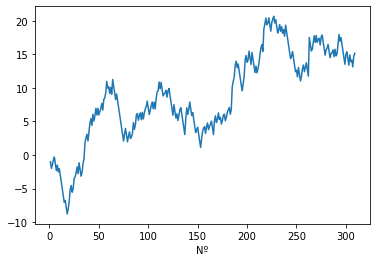

In [27]:
stake = 1
win_Back = stake * (df1.FT_Odds_H - 1)
lose_Back = -stake

df1.loc[(df1['Previsões'] == 1) & (df1['BackHome'] == 1), 'Profit'] = win_Back
df1.loc[(df1['Previsões'] == 1) & (df1['BackHome'] == 0), 'Profit'] = lose_Back
df1.loc[(df1['Previsões'] == 0) & (df1['BackHome'] == 1), 'Profit'] = 0
df1.loc[(df1['Previsões'] == 0) & (df1['BackHome'] == 0), 'Profit'] = 0

filtro = df1.Previsões == 1
df0 = df1[filtro]

# Ajustando o Índice
df0.reset_index(inplace=True, drop=True)
df0.index = df0.index.set_names(['Nº'])
df0 = df0.rename(index=lambda x: x + 1)

df0['Profit_acu'] = df0.Profit.cumsum()
df0.Profit_acu.plot()
profit = round(df0.Profit_acu.tail(1).item(),2)
ROI = round((df0.Profit_acu.tail(1)/len(df0)*100).item(),2)
print('')
print("Profit:",profit,"stakes em", len(df0),"jogos")
print("ROI:",ROI,"%")

In [40]:
dia = "21-10-2022"

In [41]:
df_today = pd.read_excel('https://github.com/leandrofilho07/Base_de_Dados/blob/main/'+ dia +'_FutPythonTrader_Jogos_do_Dia.xlsx?raw=true')
flt = (df_today.League != 'South America Copa Libertadores') & (df_today.League != 'Europe UEFA Champions League')
df_today = df_today[flt]

In [42]:
def back_home_punter():
    from logging import exception
    for a,b,c,d,e,f,g,h,i,j,k in zip(df_today.League, df_today.Date, df_today.Home, df_today.Away, df_today.Odds_H, df_today.Odds_D, df_today.Odds_A, df_today.FT_Odds_Over05,df_today.FT_Odds_Over15,df_today.FT_Odds_Over25, df_today.Odds_BTTS_Yes):

        League = a
        Date = b
        Home = c
        Away = d
        FT_Odds_H = e
        FT_Odds_D = f
        FT_Odds_A = g
        FT_Odds_Over05 = h
        FT_Odds_Over15 = i
        FT_Odds_Over25 = j
        Odds_BTTS_Yes = k
        
        try:
            Inputs = [FT_Odds_H,FT_Odds_D,FT_Odds_A,FT_Odds_Over05,FT_Odds_Over15,FT_Odds_Over25,Odds_BTTS_Yes]
            Inputs_Jogo = np.array(Inputs)

            previsao_jogo_knn = Inputs_Jogo.reshape(1, -1)
            previsao_jogo_knn = knn_dados.predict(previsao_jogo_knn)

            if previsao_jogo_knn == 1:
                lista.append([League, Date, Home, Away, FT_Odds_H, FT_Odds_D, FT_Odds_A, FT_Odds_Over05, FT_Odds_Over15, FT_Odds_Over25, Odds_BTTS_Yes])
        except:
            pass

In [43]:
colunas = ["League", "Date", "Home", "Away", "FT_Odds_H", "FT_Odds_D", "FT_Odds_A", 'FT_Odds_Over05','FT_Odds_Over15','FT_Odds_Over25','FT_Odds_BTTS_Yes']
lista = [ ]
back_home_punter()
df1 = pd.DataFrame(lista,columns=colunas)

df1.reset_index(inplace=True, drop=True)
df1.index = df1.index.set_names(['Nº'])
df1 = df1.rename(index=lambda x: x + 1)

In [44]:
df1

,League,Date,Home,Away,FT_Odds_H,FT_Odds_D,FT_Odds_A,FT_Odds_Over05,FT_Odds_Over15,FT_Odds_Over25,FT_Odds_BTTS_Yes
Nº,,,,,,,,,,,
1,Australia A-League,2022-10-21 05:45:00,Western United,Macarthur,1.95,3.47,3.28,1.03,1.22,1.75,1.62
2,Austria 2. Liga,2022-10-21 13:10:00,Liefering,Rapid Wien II,2.03,3.24,2.79,1.00,1.22,1.51,1.53
3,Germany 2. Bundesliga,2022-10-21 13:30:00,Darmstadt 98,Holstein Kiel,1.55,3.95,4.60,1.03,1.18,1.55,1.60
4,Germany 2. Bundesliga,2022-10-21 13:30:00,Hansa Rostock,Kaiserslautern,2.55,3.30,2.40,1.05,1.28,1.79,1.63
5,Bulgaria First League,2022-10-21 13:45:00,Arda,Lokomotiv Sofia 1929,1.89,3.30,3.62,1.07,1.36,2.13,1.85
6,Denmark Superliga,2022-10-21 14:00:00,OB,Lyngby,2.09,3.60,3.40,1.03,1.27,1.76,1.67
7,Germany 3. Liga,2022-10-21 14:00:00,Zwickau,Freiburg II,2.50,3.30,2.65,1.02,1.30,1.95,1.72
8,Turkey Süper Lig,2022-10-21 14:00:00,Antalyaspor,İstanbulspor,1.68,3.68,4.05,1.01,1.24,1.76,1.66
9,Romania Liga I,2022-10-21 14:30:00,Rapid Bucureşti,SSC Farul,2.37,2.95,2.95,1.10,1.49,2.56,2.05


In [45]:
# Gerando os dados para excel
from datetime import date, datetime
data = datetime.today()
hoje = data.strftime('%Y-%m-%d')
nome = 'Entradas_BackHome_FutPythonTrader'
df1.to_excel(f'{nome}_{hoje}'+'.xlsx', index = False)